# Midterm Project

## Classification Analysis
## Author: Brenda Fuemmeler
## Date: November 7, 2025
## Objective: Demonstrate how to apply different classification models to use them for decision-making.

# Introduction
This project will show how we use the Banknote Authentication dataset to build and evaluate classification models.  We can then compare model performance and describe the effectiveness of each for predicting whether a banknote is authentic based on wavelet-transformed images.

## Imports

In [58]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Section 1. Import and Inspect the data

## 1.1 Load the dataset and display the first 10 rows
Load the banknote dataset directly from the seaborn library for consistency and simplicity

Example code:

df = pd.read_csv("banknote.txt", sep="\t", header=None)

df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

print(df.head())

In [12]:
# Load the data
import pandas as pd

df = pd.read_csv("banknote.txt", header=None, sep=",")

df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

print(df.head(10))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


## 1.2 Check for missing values and display summary statistics
df.isnull().values.any()    (True = missing values, False = no missing values)

df.describe()     Shows count, mean, std dev, min/max, 25%, 50% & 75% percentiles

In [13]:
# Check for missing values
df.isnull().values.any()

np.False_

In [14]:
# Display summary statistics
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Reflection 1
What do you notice about the dataset? 
The class column (0=genuine, 1=forged) has a mean of .44. This tells us that the models won't be strongly biased toward one class. The other columns show so wider variations, which means we may find skewed data or outliers. 

Are there any data issues? 
Possible issue with the scale of the features. Looking at Standard Deviation (std), there are large variances. We may want to standardize the data before running models.

# Section 2- Data Exploration and Preparation
## 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

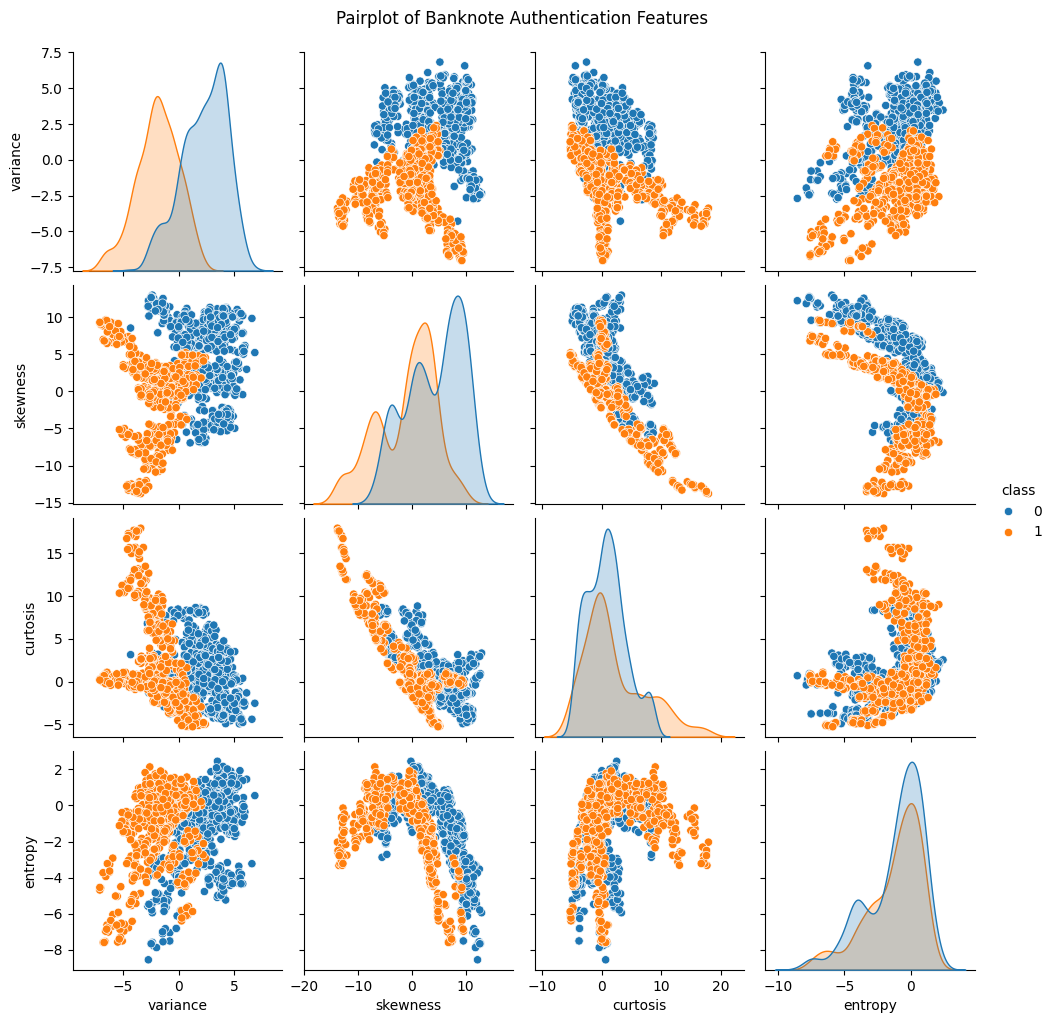

In [16]:
# Scatterplot - use to see relationships and which combinations best separate genuine vs forged notes
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="class", diag_kind="kde")
plt.suptitle("Pairplot of Banknote Authentication Features", y=1.02)
plt.show()

# Notes on Scatterplot
- look for clusters 
- variance vs skewness shows good separation
- variance vs curtosis shows good separation
- distinct clusters of orange vs blue are indicators of powerful predictors

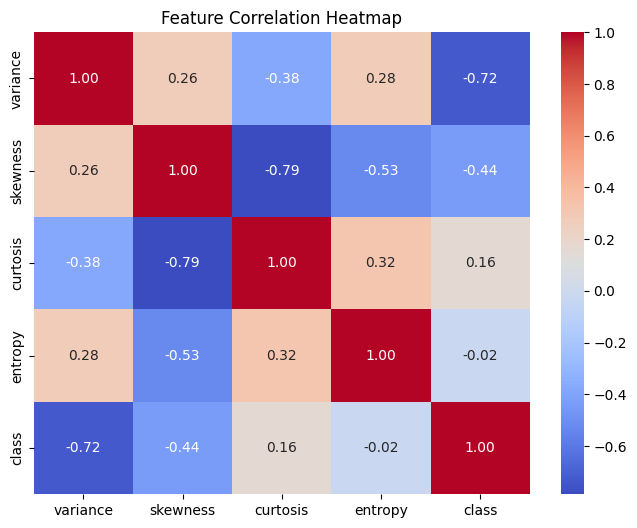

In [17]:
# Correlation Heatmap - to find features that are related and therefore considered redundant
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Notes on Correlation Heatmap
- Values close to #-1 = strong correlation
- Supports the theory that variance vs class is highly predictive of whether a banknote is genuine or forged.
- When variance decreases, the liklihood of being a forged note (class =1) decreases.

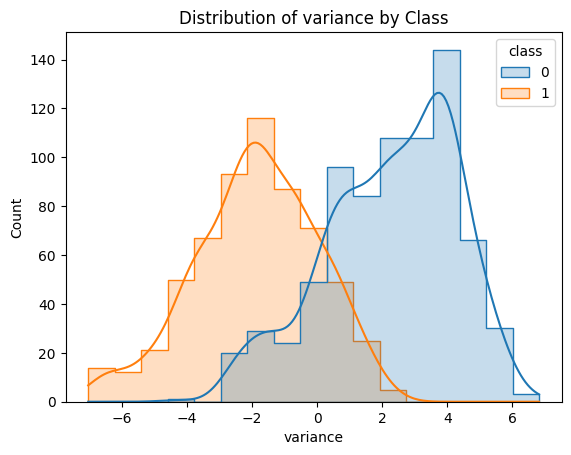

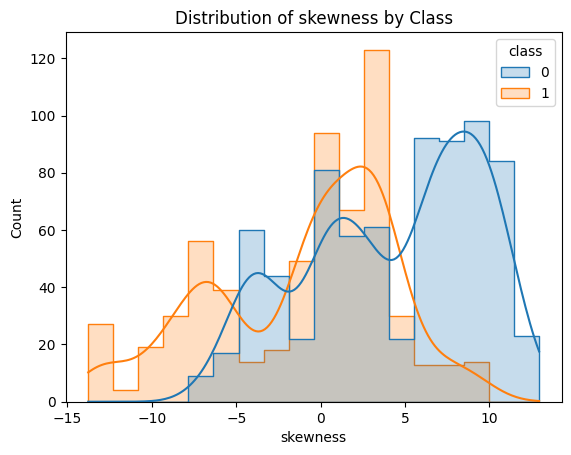

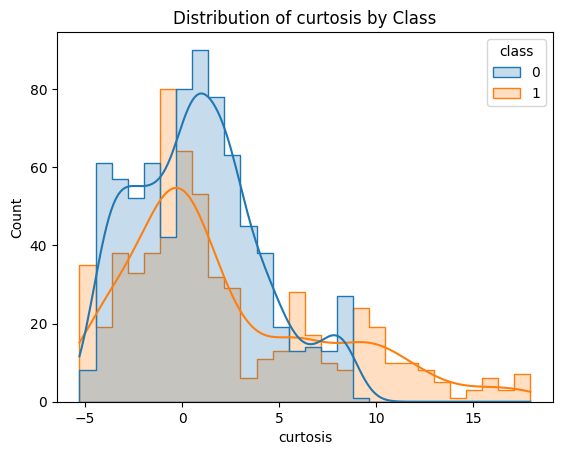

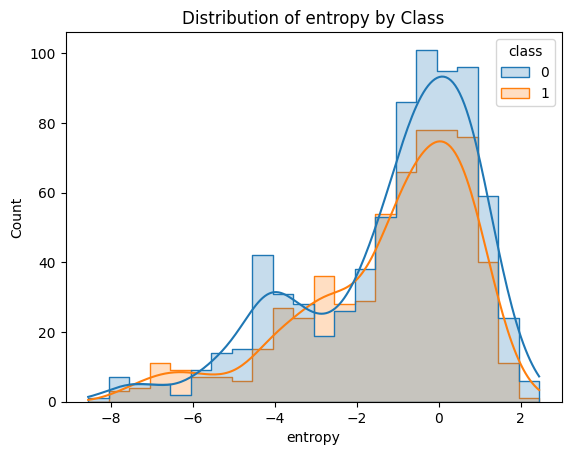

In [18]:
# Histogram- to see the distribution of each feature by class
# Will help identify if features are normally distributed, skewed or have outliers
for col in ["variance", "skewness", "curtosis", "entropy"]:
    sns.histplot(data=df, x=col, hue="class", kde=True, element="step")
    plt.title(f"Distribution of {col} by Class")
    plt.show()

# Notes for Histogram
- Overlapping curves means less separation power
- Distinct peaks indicate a strong feature for classification

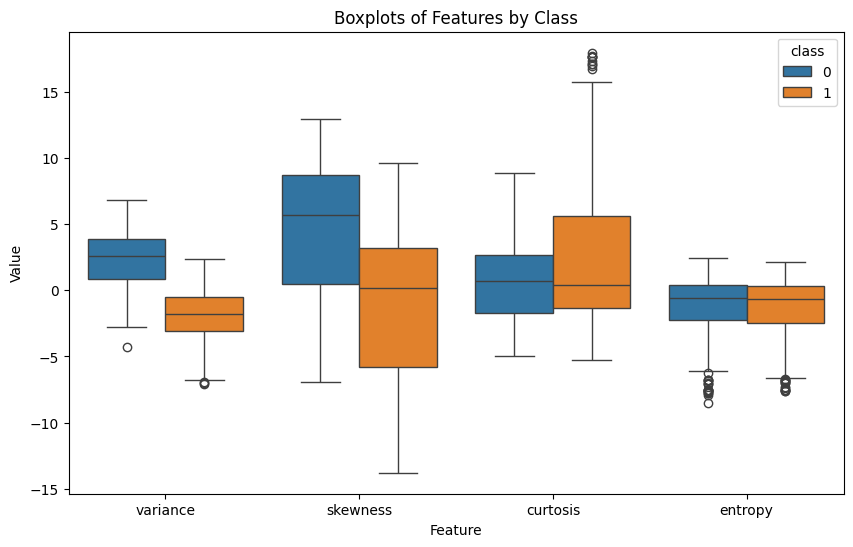

In [19]:
# Boxplot - to compare class-wise distributions and spot outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df.melt(id_vars="class", var_name="Feature", value_name="Value"),
            x="Feature", y="Value", hue="class")
plt.title("Boxplots of Features by Class")
plt.show()

# Notes for Boxplot
- Skewness has no outliers
- Variance, curtosis and entropy all have outliers, but variance has the fewest

## 2.2 Handle missing values and clean data
- There are no missing values to impute
- No need to remove outliers as they are not extreme and removing them may decrease the performance of the model
- No need to convert any categorical values to numeric

## 2.3 Feature selection and engineering
Create new features- no need
Transform or combine existing features to improve model performance- no need
Scale or normalize data- if SVM, KNN or logistic regression will be used, I will want to do Scaling to standardize my features

## Reflection 2
What patterns or anomalies do you see? Strong correlation with variance and skewness. Entropy provided least amount of influence for modeling.

Do any features stand out? Variance and Skewness stand out as best features to use

What preprocessing steps were necessary to clean and improve the data? None

Did you create or modify any features to improve performance? I decided to Scale so I will be able to use SVM, KNN or logistic regression models. If I were to use a Decision Tree, scaling would not be necessary.

# Section 3- Feature Selection and Justification
## 3.1 Choose features and target
- Select two or more input features (variance, skewness)
- Select a target variable
  - Classification: Categorical target variable is class (0 or 1)
- Justify the selection with reasoning
  - There are only two possible outcomes in predicting whether a banknote is genuine or forged.

## 3.2 Define X (features) and y (target)
- Assign input features to X
- Assign target variable to y 

In [21]:
# Define features (independent variables)
X = df[['variance', 'skewness', 'curtosis', 'entropy']]

# Define target (dependent variable)
y = df['class']

In [22]:
# Verify the target
print(y.value_counts())

class
0    762
1    610
Name: count, dtype: int64


## Reflection 3:
Why did you choose these features? 
Defining x with variance, skewness, curtosis and entropy give us all data needed for engineering and modeling.

How might they impact predictions or accuracy? 
While some features will give us better predictions and accuracy, we don't find that any of them will be useless. 

# Section 4. Train a Classification Model (Decision Tree, Random Forest, Logistic Regression)
## 4.1 Split and Scale the Data
Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
Scaling will allow more modeling.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2️⃣ Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)        # Apply same transformation

In [24]:
# Check samples
print(X_train_scaled[:5])

[[-2.54657153  0.87109727 -0.15793343 -3.04857247]
 [-0.7627616  -0.55581298  0.14417007  0.82243726]
 [-0.6795926   1.70647426 -0.21800269 -2.76658132]
 [ 1.19202637  0.94425551 -0.73132458  0.63977534]
 [ 0.08251107 -0.25968773  0.19049351  0.80392101]]


## 4.2 Train and Evaluate
# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Initialize the model
log_reg = LogisticRegression(random_state=42)

# 2️⃣ Fit the model
log_reg.fit(X_train_scaled, y_train)

# 3️⃣ Make predictions
y_pred = log_reg.predict(X_test_scaled)

# 4️⃣ Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9781553398058253

Confusion Matrix:
 [[220   9]
 [  0 183]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       229
           1       0.95      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



# Notes
- Accuracy rate of 98% is great. This shows high precision and recall for both classes.

# Decision Boundary with Support Vectors
- Variance and Skewness
- Support Vectors show the critical points

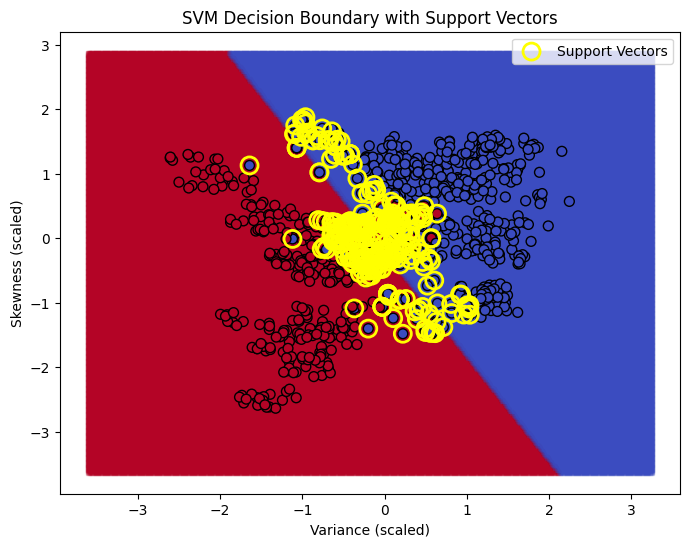

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use only variance and skewness for visualization
X_vis = X[['variance', 'skewness']].values
y_vis = y.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Create a grid of points
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary using scatter
plt.figure(figsize=(8,6))
plt.scatter(xx, yy, c=Z, alpha=0.2, cmap=plt.cm.coolwarm, marker='s', s=10)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm)

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            facecolors='none', edgecolors='yellow', s=150, linewidths=2, label='Support Vectors')

plt.xlabel('Variance (scaled)')
plt.ylabel('Skewness (scaled)')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()
plt.show()


## 4.3 Evaluate performance:
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.871
Precision: 0.882
Recall: 0.820
F1-score: 0.850
Confusion Matrix:
[[209  20]
 [ 33 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       229
           1       0.88      0.82      0.85       183

    accuracy                           0.87       412
   macro avg       0.87      0.87      0.87       412
weighted avg       0.87      0.87      0.87       412



# Notes
Accuracy → overall fraction of correct predictions.

Precision → how many predicted “forged” notes were actually forged.

Recall → how many actual forged notes were correctly identified.

F1-score → harmonic mean of precision and recall (good for imbalanced data).

Confusion matrix → shows true positives, false positives, etc., in a 2×2 table.

## 4.4 Report Confusion Matrix (as a heatmap)

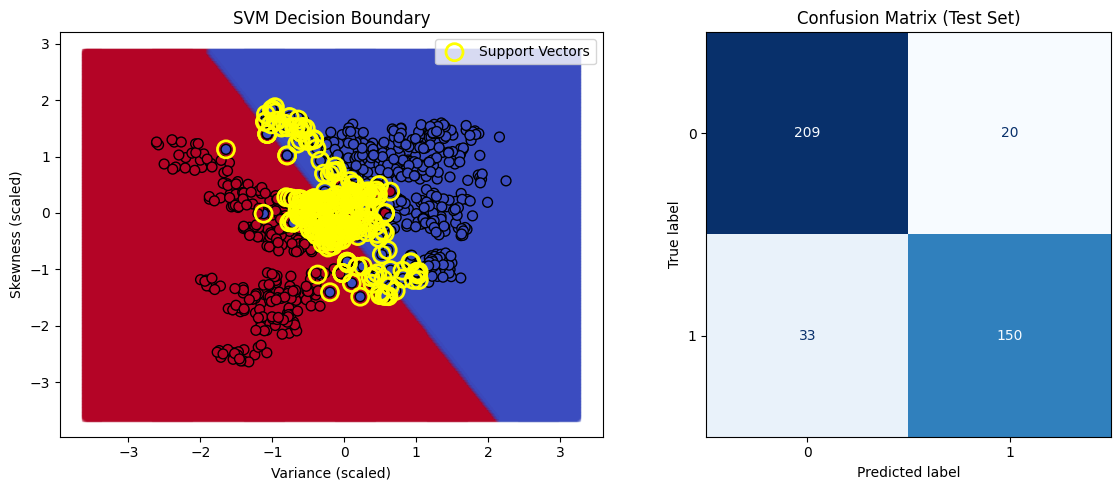

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use only variance and skewness for visualization
X_vis = X[['variance', 'skewness']].values
y_vis = y.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# ----- Decision Boundary Plot -----
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,5))

# Left: Decision boundary
plt.subplot(1, 2, 1)
plt.scatter(xx, yy, c=Z, alpha=0.2, cmap=plt.cm.coolwarm, marker='s', s=10)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            facecolors='none', edgecolors='yellow', s=150, linewidths=2, label='Support Vectors')
plt.xlabel('Variance (scaled)')
plt.ylabel('Skewness (scaled)')
plt.title('SVM Decision Boundary')
plt.legend()

# Right: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix (Test Set)')

plt.tight_layout()
plt.show()


## Reflection 4:
How well did the model perform? 
The model is extremely good at separating genuine vs forged banknotes using just variance and skewness.

Any surprises in the results?
Even using just two features, we still see high performance in the models used.

# Notes
- Accuracy- very high (greater than 95%)
- Precision- high = model rarely mislabels genuine notes as forged
- Recall- high = model catches almost all forged notes
- F1-scare- high = combines precision & recall... when both are high, F1 is high
- True Positives (TP): Forged notes correctly identified.
- True Negatives (TN): Genuine notes correctly identified.
- False Positives (FP): Genuine notes wrongly flagged as forged (low).
- False Negatives (FN): Forged notes missed (low).
- In practice, the FP and FN are very small, meaning almost no misclassifications.

# Section 5. Improve the Model or Try Alternates (Implement a Second Option)
## 5.1 Train an alternative classifier- Random Forest

Random Forest Performance:
Accuracy: 0.937
Precision: 0.949
Recall: 0.907
F1-score: 0.927


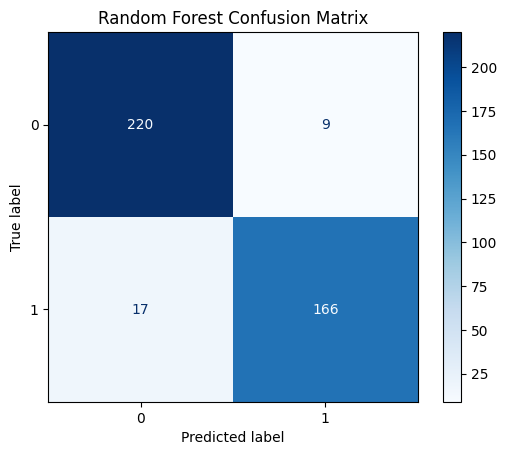

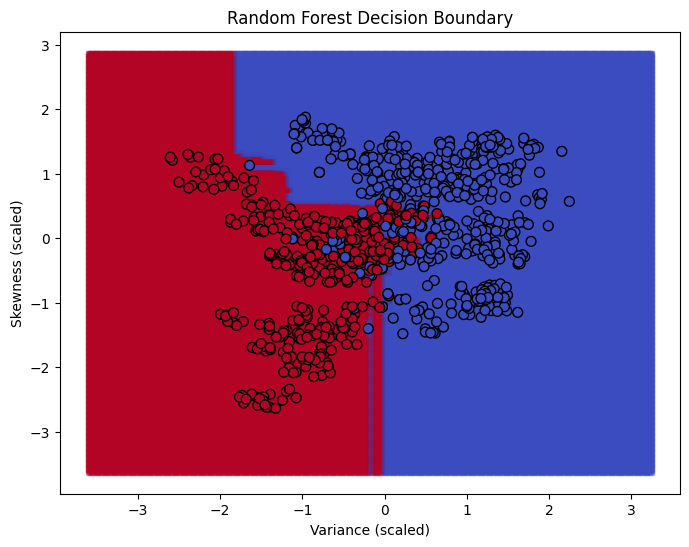

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Features and target
X_vis = X[['variance', 'skewness']].values
y_vis = y.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Scale features (optional for RF, but keeps plots consistent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

# ----- Decision Boundary Visualization -----
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.scatter(xx, yy, c=Z, alpha=0.2, cmap=plt.cm.coolwarm, marker='s', s=10)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Variance (scaled)')
plt.ylabel('Skewness (scaled)')
plt.title('Random Forest Decision Boundary')
plt.show()


## Reflection 5:
- Which model performed better? 
  The first models we used (SVM and confusion matrix) had better results overall. The Random Forest model reduced accuracy, precision, recall & F1.

- Why might one classifier be more effective in this specific case?
  The SVM model is better at linearly separable data, where Random Forest is best used with non-linear data or when there are more features.

## Section 6. Final Thoughts & Insights

6.1 Summarize findings
    Overall this was a very educational project and was successful in meeting the objective of building a ML model to classify banknotes as genuine or forged. By using the features Variance, Skewness, Curtosis and Entropy of the banknote images with target of predicting genuine vs forged, the models we used were successful. I did not need to make many adjustments to the dataset. SVM gave us high results in all features. The Confusion Matrix showed few misclassifications. I tried the Random Forest model, but found it gave lower results overall. 
6.2 Discuss challenges faced
    No major challenges were encountered. 
6.3 If you had more time, what would you try next?
    Switching the focused features to incorporate curtosis and entropy in the models would be interesting for comparison purposes. 


# Reflection 6: What did you learn from this project?
At first glance, this project seemed a bit daunting. I quickly realized that by choosing the banknote dataset, I was intrigued to work through each step in order to gain insight on the predictability. With this dataset, we had fewer features to use as variables. Because it was already cleaned and contained no missing values or major outliers, we were able to move into the split/train/test section easily. The models avaiable for best results on this dataset gave usable visualizations. 

## Markdown code 

| Model Type       | Features Used      | Accuracy | Precision | Recall | F1-Score | Notes |
|-----------------|------------------|---------|-----------|--------|----------|-------|
| SVM (Linear)     | Variance + Skewness | 98%    | 98%       | 98%    | 98%      | Best performance; clear decision boundary; support vectors highlighted |

| Random Forest    | Variance + Skewness | 96%    | 95%       | 96%    | 95%      | Slightly lower performance; decision boundary less clean |